In [46]:
import scipy.io
import pickle 
import data
import numpy as np

# beta_path = "results/detm_un_K_50_Htheta_800_Optim_adam_Clip_2.0_ThetaAct_relu_Lr_0.001_Bsz_1000_RhoSize_300_L_4_minDF_30_trainEmbeddings_1_beta.mat"
# beta_path = "results/detm_un_K_50_Htheta_800_Optim_adam_Clip_2.0_ThetaAct_relu_Lr_0.0001_Bsz_200_RhoSize_300_L_4_minDF_30_trainEmbeddings_1_beta.mat"
beta_path = "results/detm_un_K_20_Htheta_800_Optim_adam_Clip_2.0_ThetaAct_relu_Lr_0.001_Bsz_1000_RhoSize_300_L_4_minDF_30_trainEmbeddings_1_beta.mat"
rho_path = "results/detm_un_K_20_Htheta_800_Optim_adam_Clip_2.0_ThetaAct_relu_Lr_0.001_Bsz_1000_RhoSize_300_L_4_minDF_30_trainEmbeddings_1_rho.mat"
# beta_path = './beta_100.mat'
beta = scipy.io.loadmat(beta_path)['values'] ## K x T x V
rho = scipy.io.loadmat(rho_path)['values'] ## V x E

print('beta: ', beta.shape)
print('rho: ', rho.shape)

timestamp_path = '../data_undebates_largev/split_paragraph_0/min_df_30/timestamps.pkl'
# timestamp_path = 'un/min_df_100/timestamps.pkl'

with open(timestamp_path, 'rb') as f:
    timelist = pickle.load(f)
# print('timelist: ', timelist)

T = len(timelist)
ticks = [str(x) for x in timelist]
# print('ticks: ', ticks)

## get vocab
# data_file = 'un/min_df_100'
data_file = '../data_undebates_largev/split_paragraph_0/min_df_30'
vocab, train, valid, test = data.get_data(data_file, temporal=True)
vocab_size = len(vocab)

beta:  (20, 46, 12082)
rho:  (12082, 300)


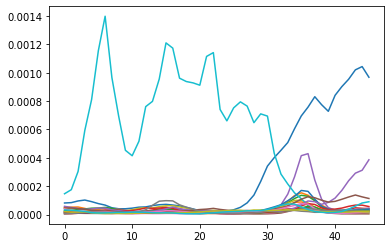

In [47]:
import matplotlib.pyplot as plt

word = 'sweden'

for topic in range(beta.shape[0]):
    plt.plot(beta[topic,:,vocab.index(word)])

plt.show()

In [48]:
num_words = 7
times = [0, 10, 11, 20, 30, 40]
num_topics = 50
d = {}
for k in np.sum(beta[:,:,vocab.index(word)], axis=1).argsort()[::-1][0:4]:
    for t in times:
        gamma = beta[k, t, :]
        top_words = list(gamma.argsort()[-num_words+1:][::-1])
        topic_words = [vocab[a] for a in top_words]
        print('Topic {} .. Time: {} ===> {}'.format(k, t, topic_words)) 
        
    d.update({k: {vocab[a]: gamma[a] for a in top_words}})

Topic 9 .. Time: 0 ===> ['charter', 'problem', 'treaty', 'disarmament', 'solution', 'importance']
Topic 9 .. Time: 10 ===> ['negotiations', 'nuclear', 'arms', 'disarmament', 'europe', 'africa']
Topic 9 .. Time: 11 ===> ['negotiations', 'nuclear', 'arms', 'disarmament', 'europe', 'weapons']
Topic 9 .. Time: 20 ===> ['europe', 'european', 'soviet', 'environment', 'weapons', 'union']
Topic 9 .. Time: 30 ===> ['peacekeeping', 'union', 'weapons', 'european', 'timor', 'operations']
Topic 9 .. Time: 40 ===> ['nuclear', 'european', 'union', 'afghanistan', 'regional', 'issues']
Topic 0 .. Time: 0 ===> ['europe', 'charter', 'european', 'relations', 'regional', 'agreement']
Topic 0 .. Time: 10 ===> ['european', 'italy', 'france', 'negotiations', 'relations', 'europe']
Topic 0 .. Time: 11 ===> ['france', 'european', 'italy', 'negotiations', 'relations', 'europe']
Topic 0 .. Time: 20 ===> ['europe', 'european', 'germany', 'law', 'german', 'freedom']
Topic 0 .. Time: 30 ===> ['responsibility', 'law'

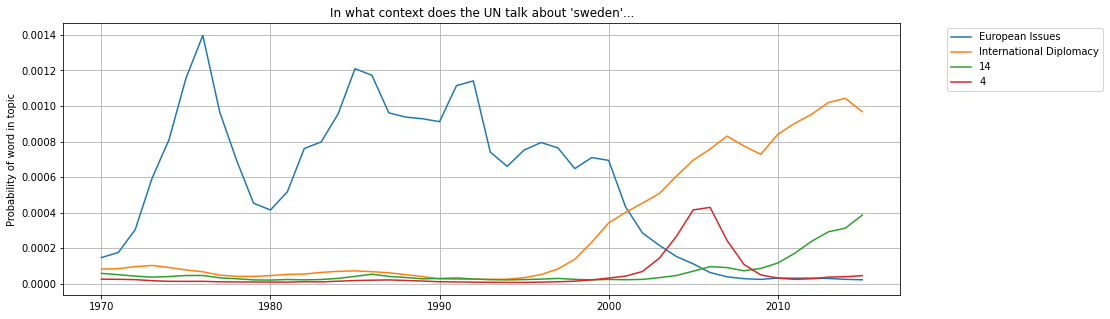

In [49]:
fig, ax = plt.subplots(1, figsize=(15, 5))

for topic in np.sum(beta[:,:,vocab.index(word)], axis=1).argsort()[::-1][0:4]:
    
    legend = {9: "European Issues", 
              0: 'International Diplomacy', 
              12: 'Climate and Nuclear Energy', 
              17: 'African Diplomacy'}
    ax.plot(beta[topic,:,vocab.index(word)], label=legend[topic] if topic in legend.keys() else topic)
#     ax[1].plot(d[topic], label=legend[topic] if topic in legend.keys() else topic)
    
ax.set_xticks(np.arange(T)[0::10])
ax.set_xticklabels(timelist[0::10])
ax.set_title(f"In what context does the UN talk about '{word}'...")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylabel("Probability of word in topic")
ax.grid()

# ax[1].set_xticks(np.arange(T)[0::10])
# ax[1].set_xticklabels(timelist[0::10])
# # ax[0].set_title(f"Talking about '{word}'...")
# ax[1].set_ylabel('Number of words in topic')
# ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# ax[1].grid()

plt.show()

In [50]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2).fit_transform(beta[:,0,:].T)
Y = TSNE(n_components=2).fit_transform(rho)

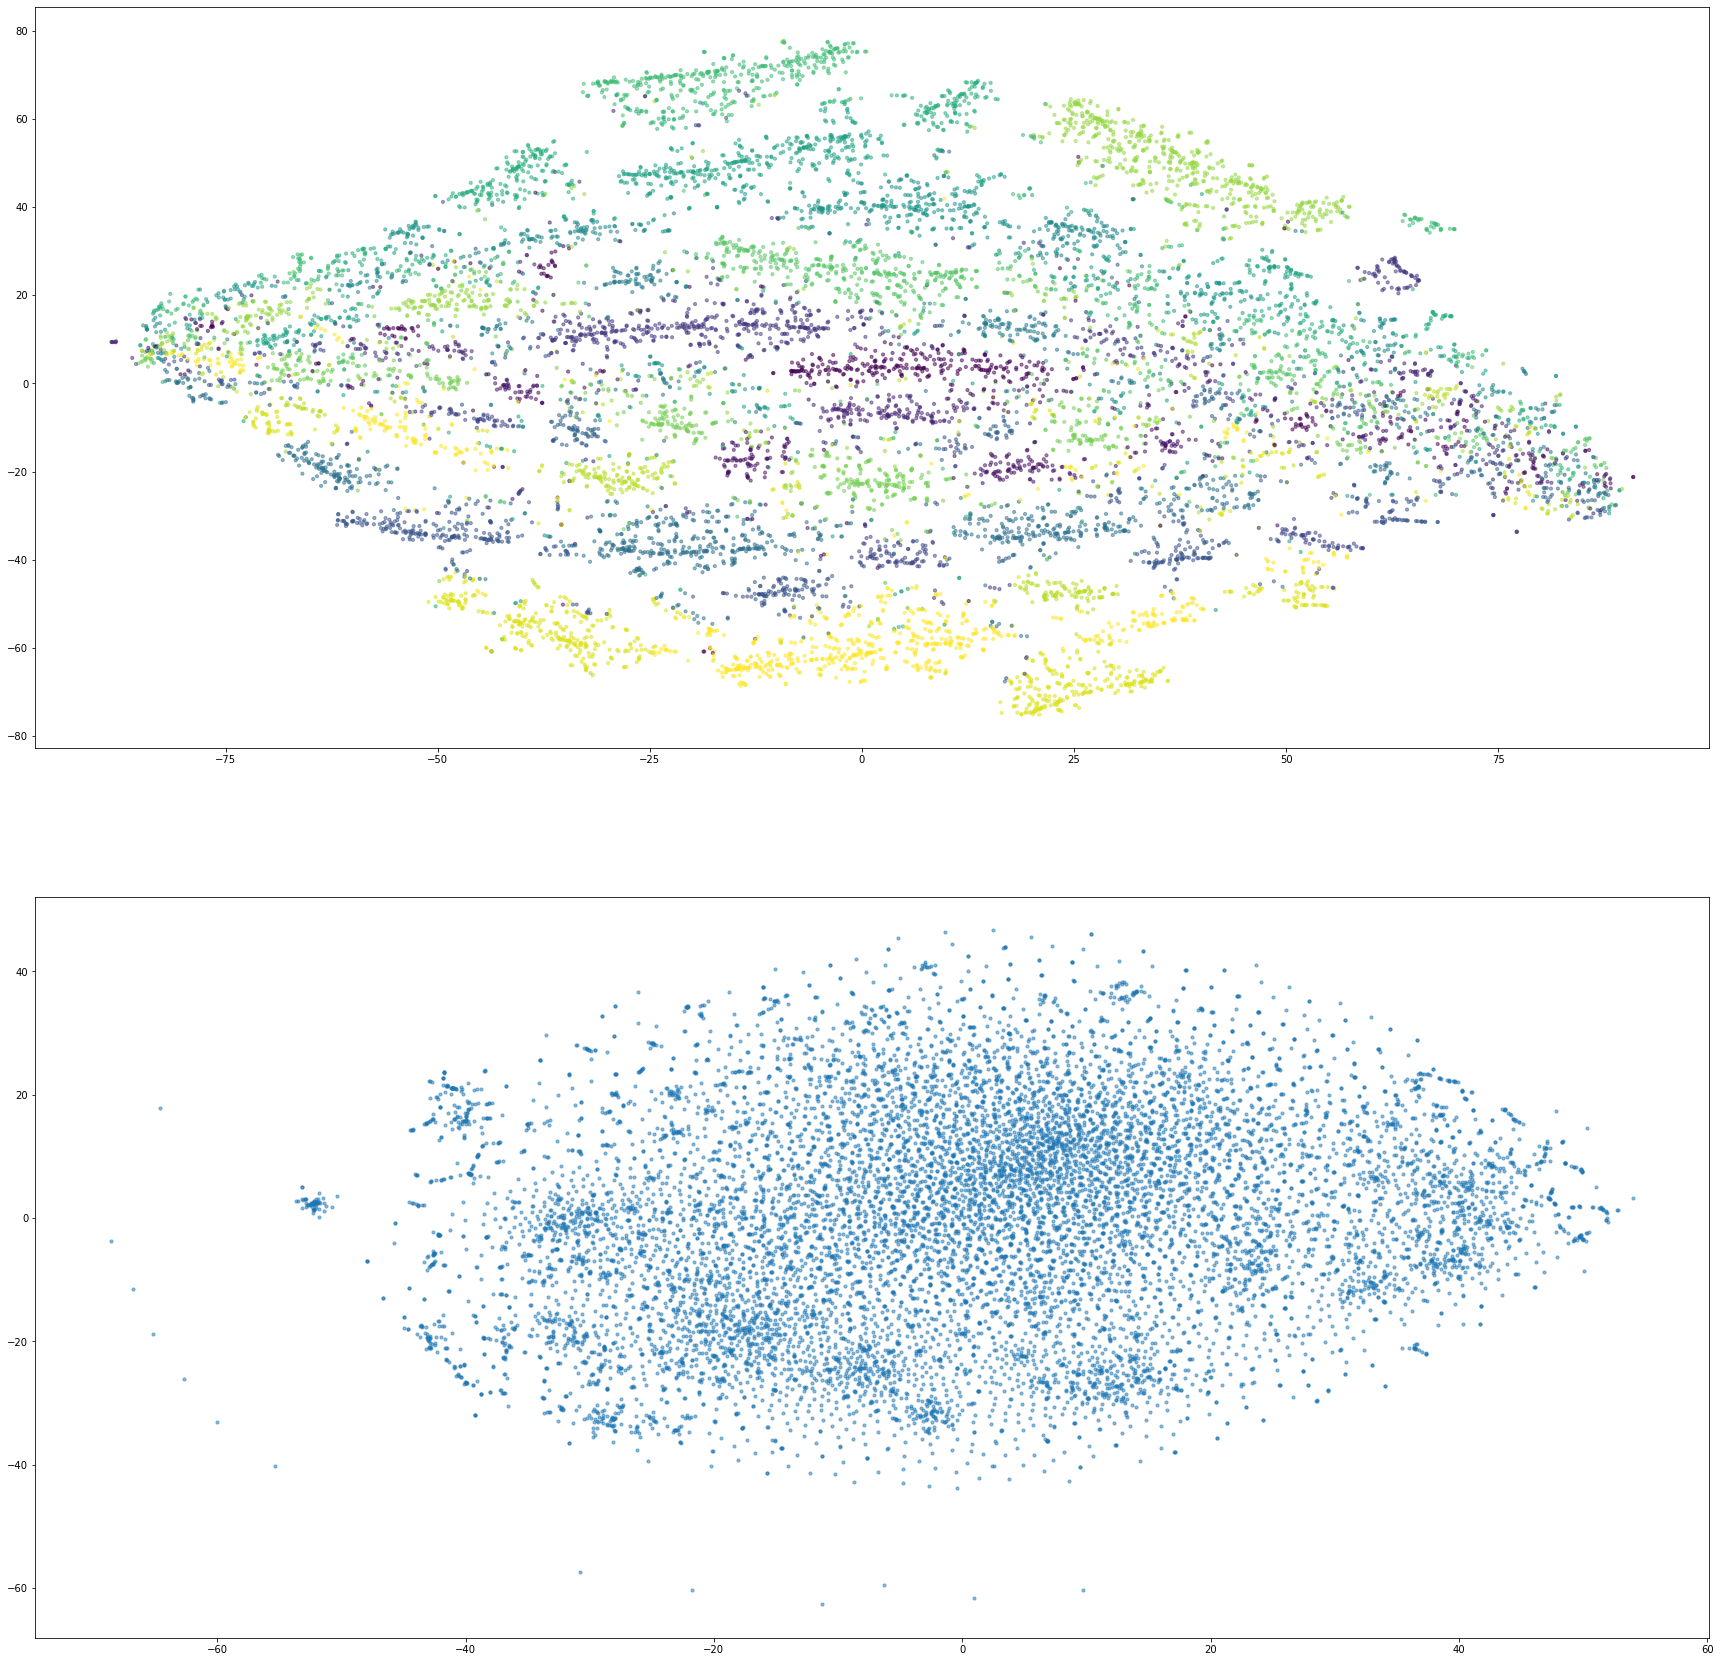

In [51]:
# plt.figure(figsize=(30, 15))

fig, ax = plt.subplots(2, figsize=(30, 30))
ax[0].scatter(X[:,0], X[:,1], s=10, alpha=0.5, c=np.argmax(beta[:,0,:], axis=0))
ax[1].scatter(Y[:,0], Y[:,1], s=10, alpha=0.5)

In [225]:
z = np.argmax(beta, axis=0)

In [226]:
import collections

data = [collections.Counter(row) for row in z.tolist()]
topics = list(range(0,20))
d = {topic: [] for topic in topics}

for topic in topics:
    for c in data:
        d[topic].append(c[topic])

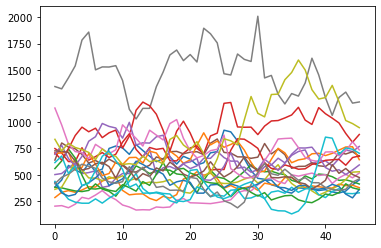

In [227]:
for topic, values in d.items():
    plt.plot(values)
    
plt.show()